<AxesSubplot: >

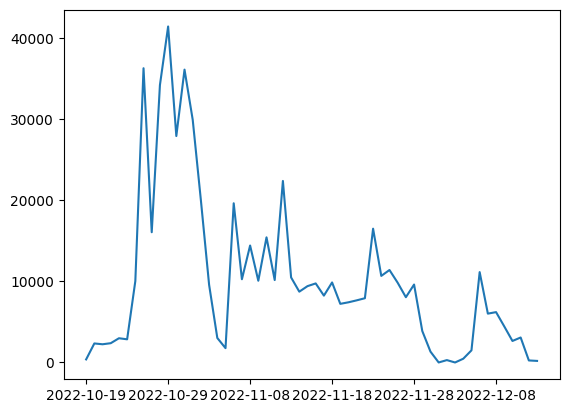

In [2]:
#CREAZIONE DI UN GRAFICO CHE RAPPRESENTA IL NUMERO DI TWEET PER GIORNO
import pandas as pd

# Plot a line histogram of the number of tweets per day
ttdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\tt.csv", dtype = {'created_at':'str'}, low_memory=False )

ttdf['created_at'].str[:-9].value_counts().sort_index().plot(kind='line')

POSITIVE WORDS



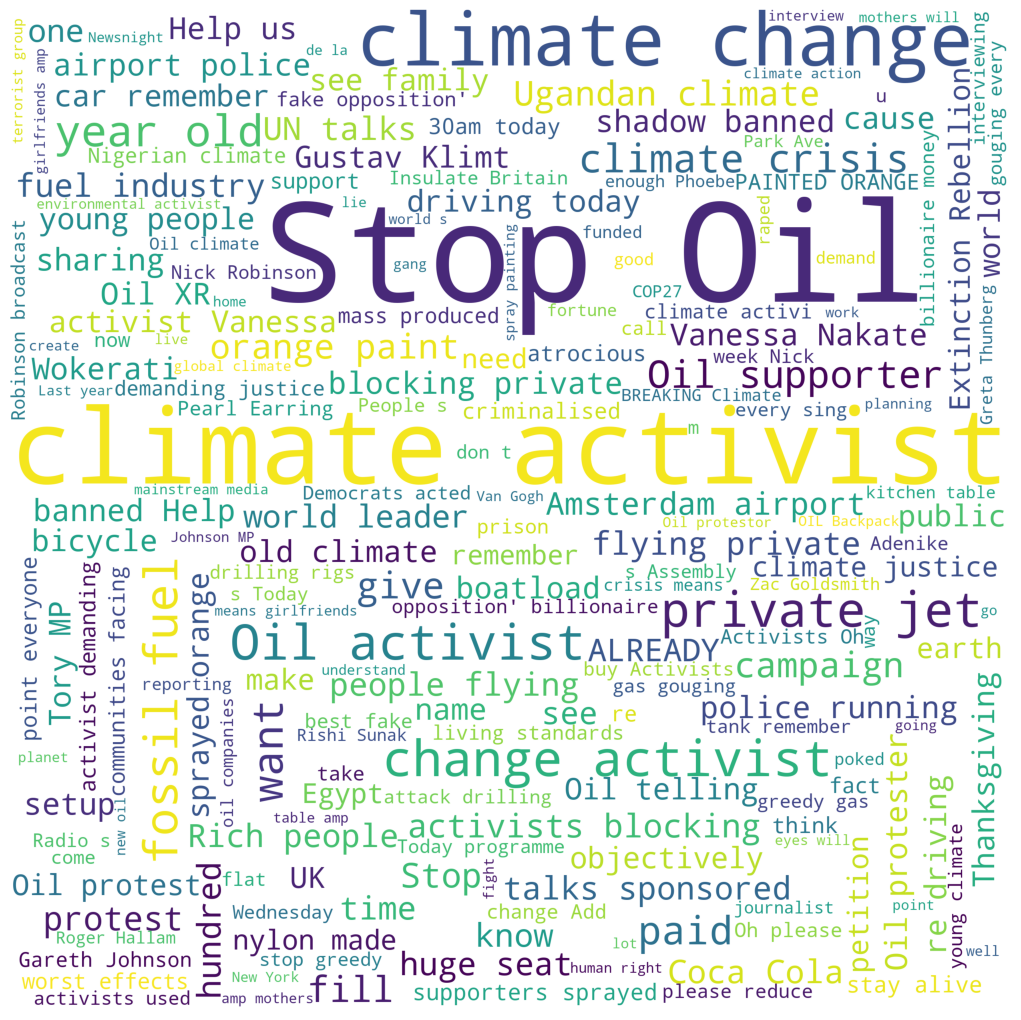

NEGATIVE WORDS



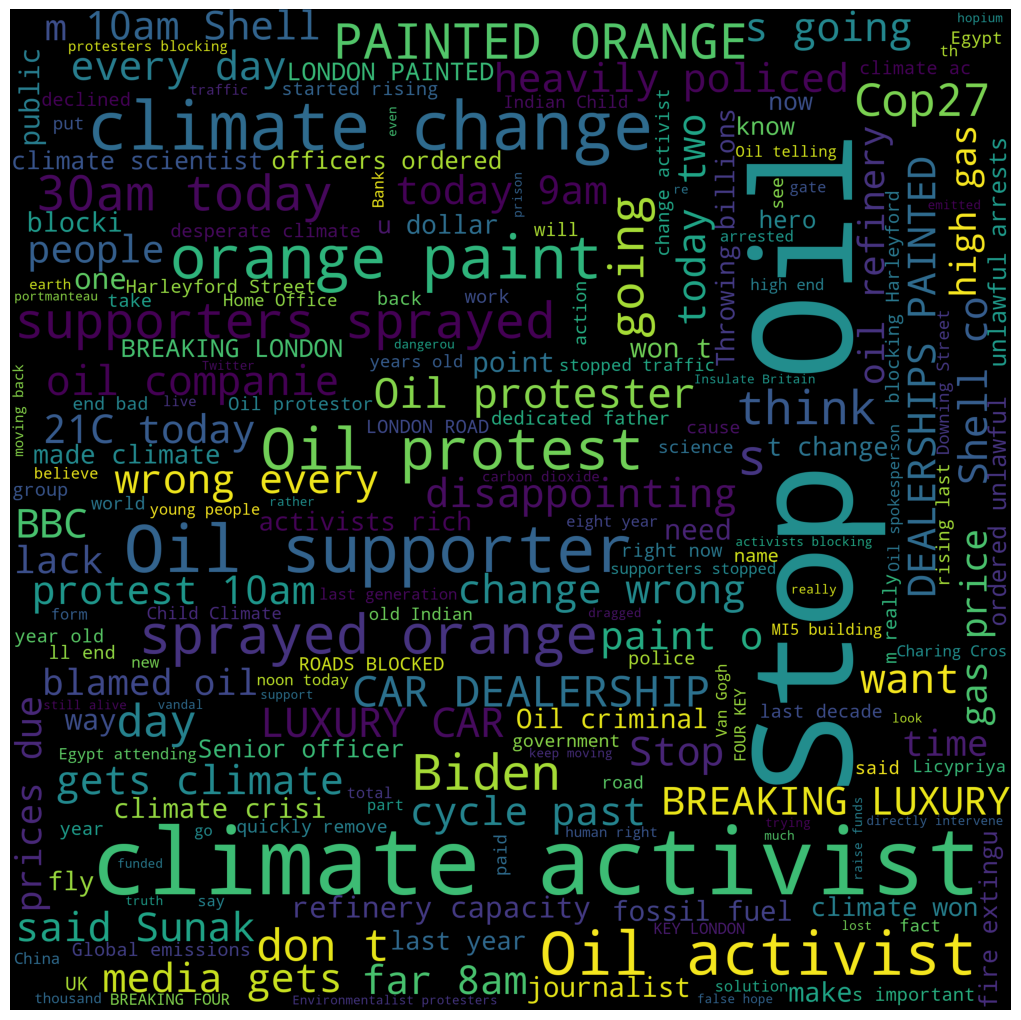

In [4]:
#CREAZIONE DI WORDCLOUD PER I TWEET POSITIVI E NEGATIVI DAL FILE CON I SENTIMENTI RICAVATI DA EXCEL
import sklearn
from sklearn.model_selection import train_test_split
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#WORDCLOUD
ttoadf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttoa.csv")

data = ttoadf[['tweet_text','Sentiment']]

#split del dataset in trai e test
train,test = train_test_split(data, test_size = 0.1)

#rimozione sentimenti neutrali
train = train[train.Sentiment != "neutral"]

train_pos = train[ train['Sentiment'] == 'positive']
train_pos_text = train_pos['tweet_text']

train_neg = train[ train['Sentiment'] == 'negative']
train_neg_text = train_neg['tweet_text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                      if 'http' not in word
                      and not word.startswith('@')
                      and not word.startswith('#')
                      and word != 'RT'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color = color,
                          width=2500,
                          height=2500).generate(cleaned_word)
    plt.figure(1, figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("POSITIVE WORDS\n")
wordcloud_draw(train_pos_text, 'white')
print("NEGATIVE WORDS\n")
wordcloud_draw(train_neg_text, 'black')

In [ ]:
# PEZZO DI CODICE PER SENTIMENTAL ANALYSIS CON TEXTBLOB E CREAZIONE DI UN NUOVO CSV CON I SENTIMENTI
import pandas as pd
import textblob
from textblob import TextBlob
ttdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttNoCol.csv", dtype = {'created_at':'str'}, low_memory=False )

ttdf['full_text'] = ttdf['full_text'].astype(str)
ttdf['Sentiment'] = ttdf['full_text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
ttdf['Sentiment'] = ttdf['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
ttdf.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttpy.csv", index=False)

In [52]:
# PEZZO DI CODICE PER CREAZIONE DI UN FILE CSV PARTENDO DA XLSX IN PYTHON
import pandas as pd
import textblob
from textblob import TextBlob
ttdf = pd.read_excel("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\SocialNetworkAnalysisProject\\Dataframes\\xlsx\\TweetTotali.xlsx")

ttdf['full_text'] = ttdf['full_text'].astype(str)
ttdf['Sentiment'] = ttdf['full_text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
ttdf['Sentiment'] = ttdf['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
ttdf.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\TweetTotali_py.csv", index=False)

<AxesSubplot: >

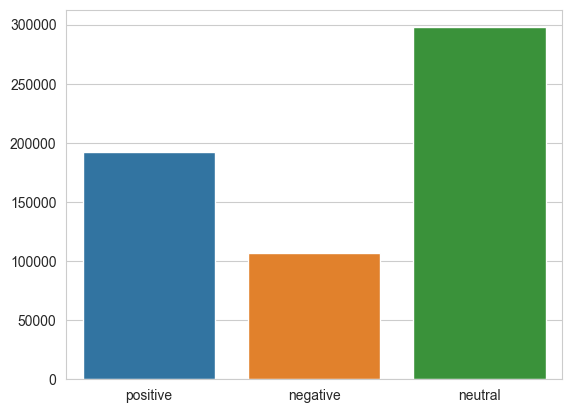

In [62]:
#CREARE BARPLOT DI TUTTI I TWEET

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tweettotdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\TweetTotali_py.csv", dtype = {'created_at':'str'}, low_memory=False )

pos = tweettotdf['Sentiment'].value_counts()['positive']
neg = tweettotdf['Sentiment'].value_counts()['negative']
neu = tweettotdf['Sentiment'].value_counts()['neutral']

#barplot of pos neg neu
sns.set_style("whitegrid")
sns.barplot(x=['positive','negative','neutral'], y=[pos,neg,neu])


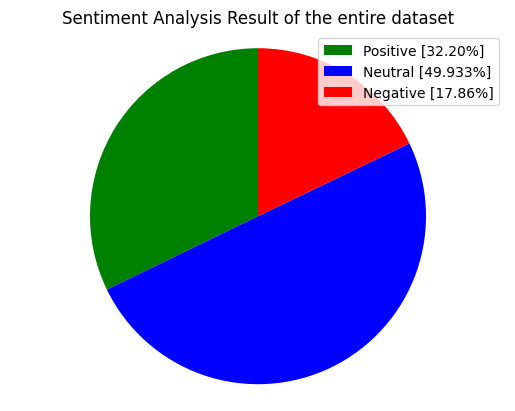

In [71]:
#PIE CHART DI TUTTI I TWEET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tweettotdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\TweetTotali_py.csv", dtype = {'created_at':'str'}, low_memory=False )
Positive = tweettotdf['Sentiment'].value_counts()['positive']
Negative = tweettotdf['Sentiment'].value_counts()['negative']
Neutral = tweettotdf['Sentiment'].value_counts()['neutral']

#pie chart of sentiments of tweettotdf dataset
labels = ["Positive ["+str((Positive/596374)*100)[:-12]+"%]" , "Neutral ["+str((Neutral/596374)*100)[:-12]+"%]","Negative ["+str((Negative/596374)*100)[:-12]+"%]"]
sizes = [Positive, Neutral, Negative]
colors = ["green", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result of the entire dataset")
plt.axis("equal")
plt.show()

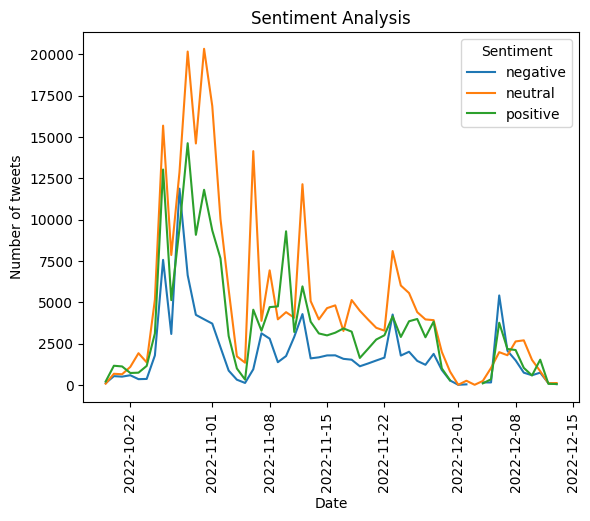

In [53]:
#3 LINES CHART DAL FILE TWEET TOTALI CSV FATTO CON PYTHON
import matplotlib.pyplot as plt
tweettotdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\TweetTotali_py.csv", dtype = {'created_at':'str'}, low_memory=False )

# plot a 3 line chart with sentiments from ttpydf dataset and reduce the y values
tweettotdf['date'] = pd.to_datetime(tweettotdf['created_at']).dt.date
#plt.show(ttpydf.groupby('date')['Sentiment'].value_counts().unstack().plot())
plot = tweettotdf.groupby('date')['Sentiment'].value_counts().unstack().plot()
plot.set_title("Sentiment Analysis")
plot.set_ylabel("Number of tweets")
plot.set_xlabel("Date")
plt.xticks(rotation=90)
plt.show(plot)


In [8]:
#PULIZIA DATASET
'''
ttdf.drop('in_reply_to_status_id',axis=1, inplace=True)
ttdf.drop('in_reply_to_status_id_str',axis=1, inplace=True)
ttdf.drop('in_reply_to_user_id',axis=1, inplace=True)
ttdf.drop('in_reply_to_user_id_str',axis=1, inplace=True)
ttdf.drop('retweeted_status',axis=1, inplace=True)
ttdf.drop('withheld_in_countries',axis=1, inplace=True)
ttdf.drop('quoted_status_id',axis=1, inplace=True)
ttdf.drop('quoted_status_id_str',axis=1, inplace=True)
ttdf.drop('quoted_status',axis=1, inplace=True)
'''
ttdf.head()
ttdf.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttpyNoCol.csv", index=False)

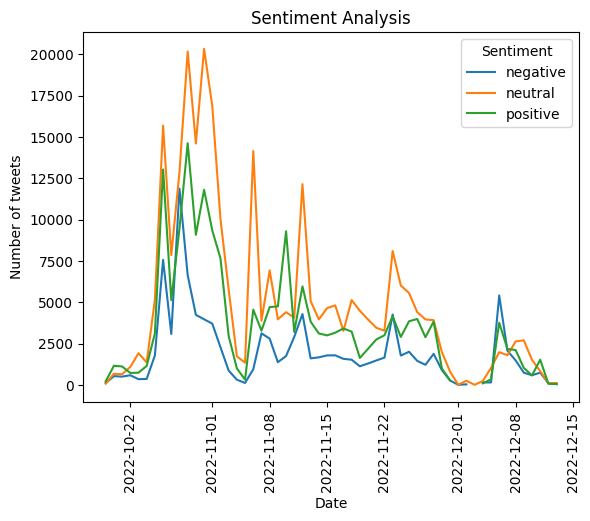

In [34]:
#3 LINE CHART CON SENTIMENTI DEL DATASET COMPLETO TTPY (IL FILE UTILIZZATO ERA STATO CONVERTITO TRAMITE RSTUDIO)
import matplotlib.pyplot as plt
ttpydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttpyNoCol.csv", dtype = {'created_at':'str'}, low_memory=False )

# plot a 3 line chart with sentiments from ttpydf dataset and reduce the y values
ttpydf['date'] = pd.to_datetime(ttpydf['created_at']).dt.date
#plt.show(ttpydf.groupby('date')['Sentiment'].value_counts().unstack().plot())
plot = ttpydf.groupby('date')['Sentiment'].value_counts().unstack().plot()
plot.set_title("Sentiment Analysis")
plot.set_ylabel("Number of tweets")
plot.set_xlabel("Date")
plt.xticks(rotation=90)
plt.show(plot)


<AxesSubplot: >

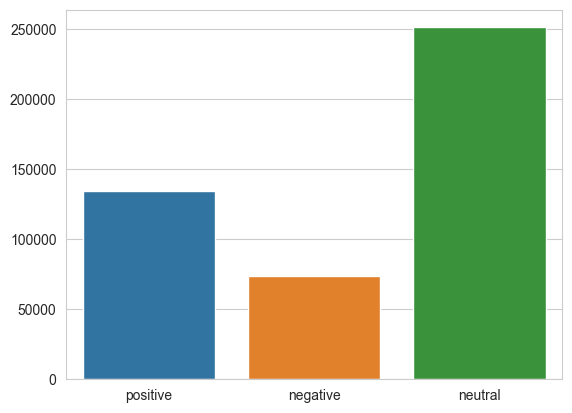

In [61]:
#CREARE BARPLOT DEI TWEET MIRATI CON PYTHON

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtspydf.csv", dtype = {'created_at':'str'}, low_memory=False )

pos = mtspydf['Sentiment'].value_counts()['positive']
neg = mtspydf['Sentiment'].value_counts()['negative']
neu = mtspydf['Sentiment'].value_counts()['neutral']

#barplot of pos neg neu
sns.set_style("whitegrid")
sns.barplot(x=['positive','negative','neutral'], y=[pos,neg,neu])


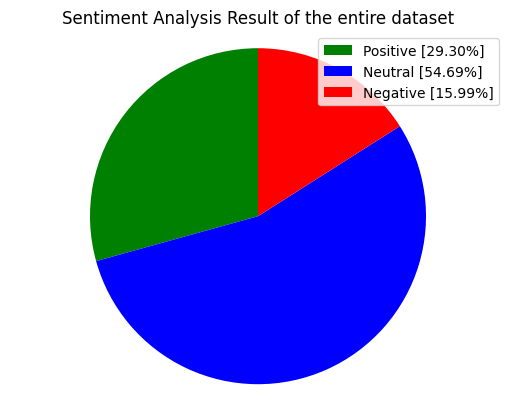

In [75]:
#PIE CHART DEI TWEET MIRATI CON PYTHON
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtspydf.csv", dtype = {'created_at':'str'}, low_memory=False )
Positive = mtspydf['Sentiment'].value_counts()['positive']
Negative = mtspydf['Sentiment'].value_counts()['negative']
Neutral = mtspydf['Sentiment'].value_counts()['neutral']

#pie chart of sentiments of tweettotdf dataset
labels = ["Positive ["+str((Positive/459488)*100)[:-13]+"%]" , "Neutral ["+str((Neutral/459488)*100)[:-12]+"%]","Negative ["+str((Negative/459488)*100)[:-13]+"%]"]
sizes = [Positive, Neutral, Negative]
colors = ["green", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result of the entire dataset")
plt.axis("equal")
plt.show()

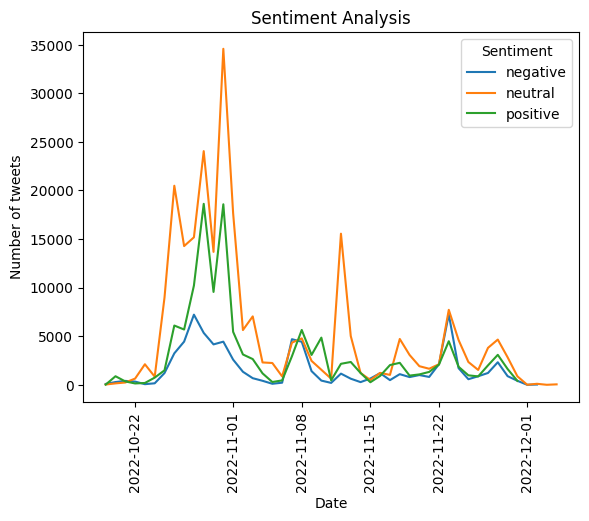

In [97]:
#3 LINE CHART CON SENTIMENTI DEL DATASET MTDF OSSIA QUELLO PIU MIRATO
import matplotlib.pyplot as plt

#mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtdf.csv", dtype = {'created_at':'str'}, low_memory=False )
#mtspydf['full_text'] = mtspydf['full_text'].astype(str)
#mtspydf['Sentiment'] = mtspydf['full_text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
#mtspydf['Sentiment'] = mtspydf['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
#mtspydf.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtspydf.csv", index=False)

# plot a 3 line chart with sentiments from ttpydf dataset and reduce the y values
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtspydf.csv", dtype = {'created_at':'str'}, low_memory=False )
mtspydf['date'] = pd.to_datetime(ttpydf['created_at']).dt.date
plot = mtspydf.groupby('date')['Sentiment'].value_counts().unstack().plot()
plot.set_title("Sentiment Analysis")
plot.set_ylabel("Number of tweets")
plot.set_xlabel("Date")
plt.xticks(rotation=90)
plt.show(plot)

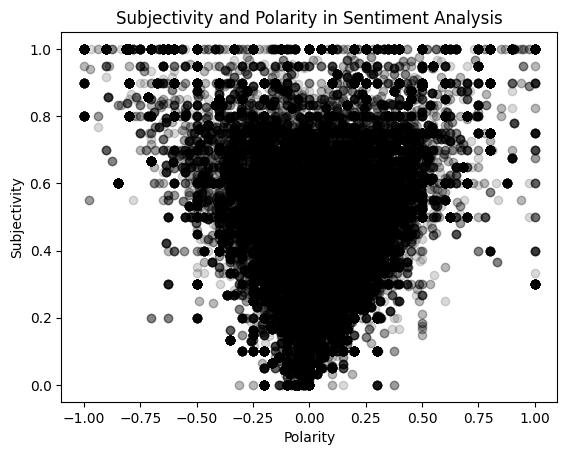

In [1]:
#SCATTER PLOT DI POLARITA E SOGGETTIVITA DEI TWEET MIRATI CON PYTHON
import matplotlib.pyplot as plt
import pandas as pd
import textblob
from textblob import TextBlob
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv", dtype = {'created_at':'str'}, low_memory=False )
# draw a scatter plot with polarity and subjectivity of the mtspydf dataset
#mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtspydf.csv", dtype = {'created_at':'str'}, low_memory=False )
#mtspydf['score'] = mtspydf['full_text'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
#mtspydf['polarity'] = mtspydf['full_text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
#mtspydf.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv", index=False)
plt.scatter(mtspydf['polarity'], mtspydf['score'], color='black', alpha=0.15)
plt.title('Subjectivity and Polarity in Sentiment Analysis')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

POSITIVE WORDS



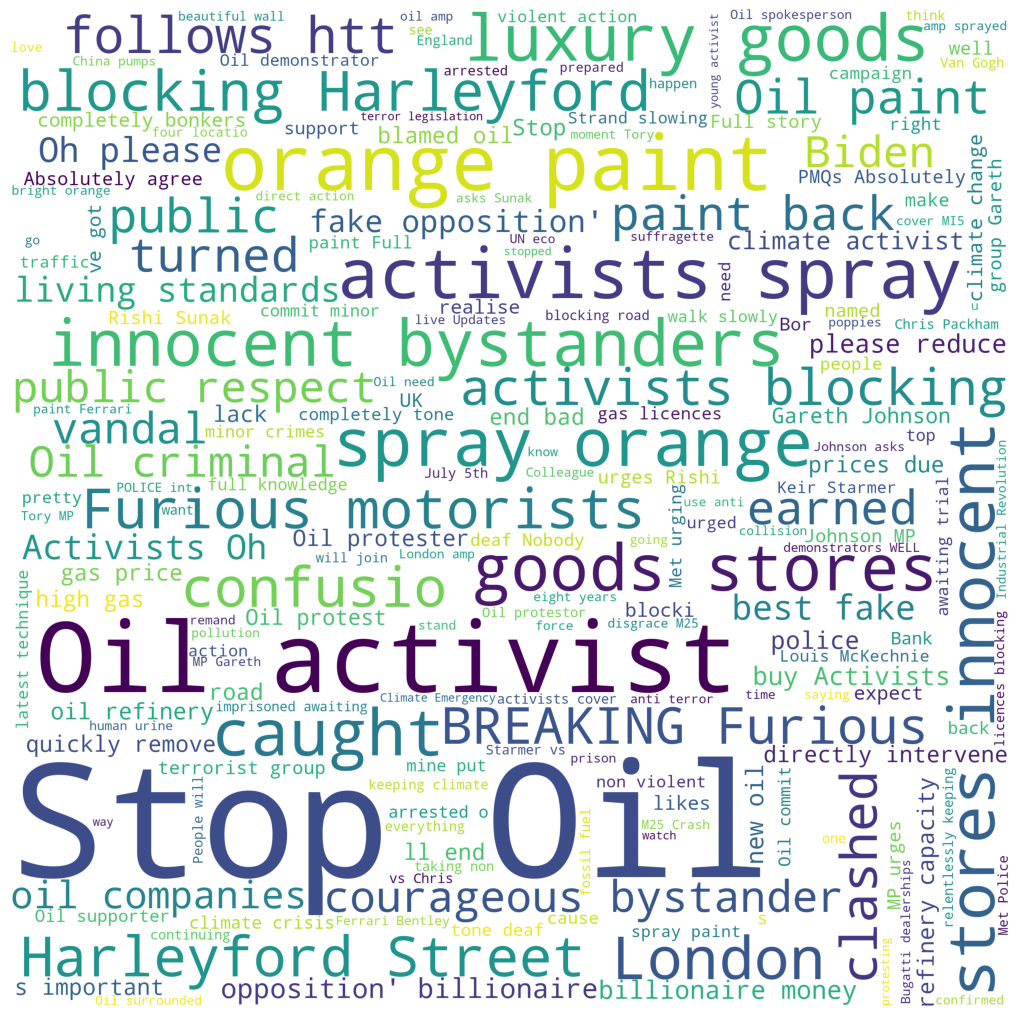

NEGATIVE WORDS



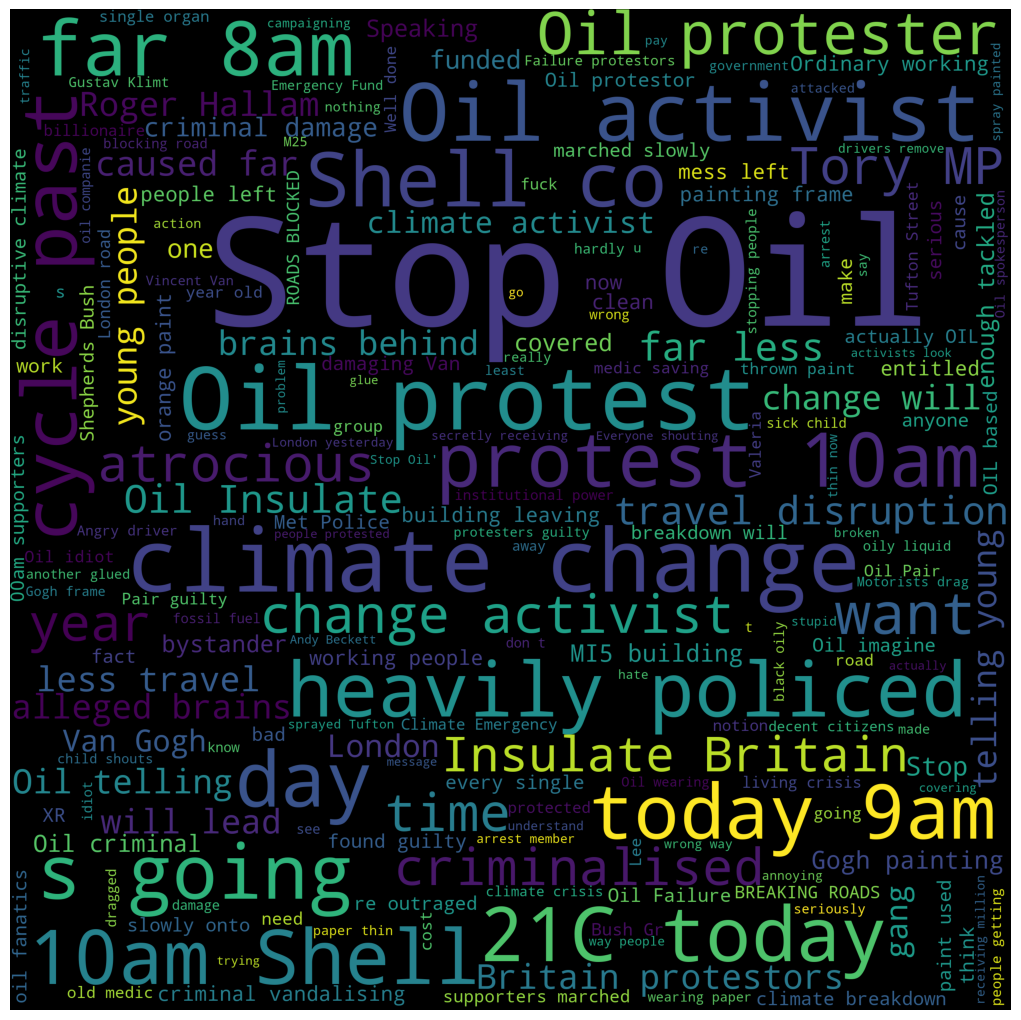

In [111]:
#CREAZIONE DI WORDCLOUD PER I TWEET POSITIVI E NEGATIVI DAL FILE CON I SENTIMENTI RICAVATI DA PYTHON
import sklearn
from sklearn.model_selection import train_test_split
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#WORDCLOUD
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtspydf.csv")

data = mtspydf[['full_text','Sentiment']]

#split del dataset in trai e test
train,test = train_test_split(data, test_size = 0.1)

#rimozione sentimenti neutrali
train = train[train.Sentiment != "neutral"]

train_pos = train[ train['Sentiment'] == 'positive']
train_pos_text = train_pos['full_text']

train_neg = train[ train['Sentiment'] == 'negative']
train_neg_text = train_neg['full_text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                      if 'http' not in word
                      and not word.startswith('@')
                      and not word.startswith('#')
                      and word != 'RT'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color = color,
                          width=2500,
                          height=2500).generate(cleaned_word)
    plt.figure(1, figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("POSITIVE WORDS\n")
wordcloud_draw(train_pos_text, 'white')
print("NEGATIVE WORDS\n")
wordcloud_draw(train_neg_text, 'black')

In [44]:
#VISUALIZZAZIONE DELLE PRIME RIGHE DEL DATASET
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv", dtype = {'created_at':'str'}, low_memory=False )
mtspydf.head()

Unnamed: 0                     Source.Name           created_at  \
0           1  tweets_regarding_movement.xlsx  2022-10-26 13:07:46   
1           2  tweets_regarding_movement.xlsx  2022-10-26 12:26:11   
2           3  tweets_regarding_movement.xlsx  2022-10-26 12:15:53   
3           4  tweets_regarding_movement.xlsx  2022-10-26 12:03:01   
4           5  tweets_regarding_movement.xlsx  2022-10-26 11:44:36   

             id        id_str  \
0  1.585257e+18  1.585257e+18   
1  1.585246e+18  1.585246e+18   
2  1.585244e+18  1.585244e+18   
3  1.585241e+18  1.585241e+18   
4  1.585236e+18  1.585236e+18   

                                           full_text  truncated  \
0  @myldn Oil-based paint? 🤔🙄\r\r\r\n@JustStop_Oi...      False   
1  RT @Terror_Alarm: 🚨🇬🇧🎂 #JustStopOil activists ...      False   
2  @PaulBrown_UK Hey #JustStopOil you are stoppin...      False   
3  @JustStop_Oil @RishiSunak Wonderful courageous...      False   
4  RT @XRWorthing: The best answer to those criti...      False   

   display_text_range  entities  metadata  ... timestamp_ms  reply_count  \
0                 182       NaN       NaN  ...          NaN          NaN   
1                 140       NaN       NaN  ...          NaN          NaN   
2                 122       NaN       NaN  ...          NaN          NaN   
3                 254       NaN       NaN  ...          NaN          NaN   
4                 140       NaN       NaN  ...          NaN          NaN   

   filter_level  query  withheld_scope withheld_copyright  \
0           NaN    NaN             NaN                NaN   
1           NaN    NaN             NaN                NaN   
2           NaN    NaN             NaN                NaN   
3           NaN    NaN             NaN                NaN   
4           NaN    NaN             NaN                NaN   

   possibly_sensitive_appealable  Sentiment     score  polarity  
0                            NaN   negative  0.750000 -0.200000  
1                            NaN    neutral  0.000000  0.000000  
2                            NaN   negative  0.000000 -0.050000  
3                            NaN   positive  0.733333  0.583333  
4                            NaN   positive  0.300000  1.000000  

[5 rows x 48 columns]

KeyboardInterrupt: 

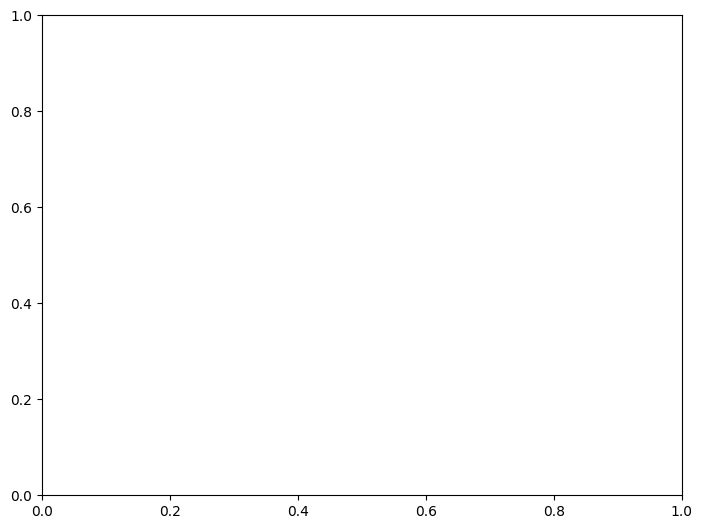

In [73]:
#GRAFO BIPARTITA CON SENTIMENT SCORE E TWEET (da fare in questi giorni)
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite

#mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv", dtype = {'created_at':'str'}, low_memory=False )
subset = mtspydf[['id','Sentiment']]
'''
G = nx.Graph();

G.add_nodes_from( df['Sentiment'], bipartite=0)
G.add_nodes_from(df['id'], bipartite=1)
G.add_edges_from(df[['Sentiment','id']].values)
nx.draw(G, with_labels=True)
plt.show()
'''
subset.head()

G = nx.Graph()
G.add_nodes_from(subset['Sentiment'], bipartite=0)
G.add_nodes_from(subset['id'], bipartite=1)
G.add_edges_from(subset[['Sentiment','id']].values)
nx.draw(G, with_labels=True)
plt.show()

###LAVORARE CON BIG DATA TRAMITE TERMINALE

- Dividere per 1000 righe
    split -l 1000 bigdata.csv
- Dividere per byte
    splot -b 50k bigdata.csv
- Dividere e usare un nome specifico
    split -l 1000 bigdata.csv ilmiofile

In [81]:
#Controllare la lunghezza del dataset con cui sto lavorando
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv")
   
print(len(df))

459488


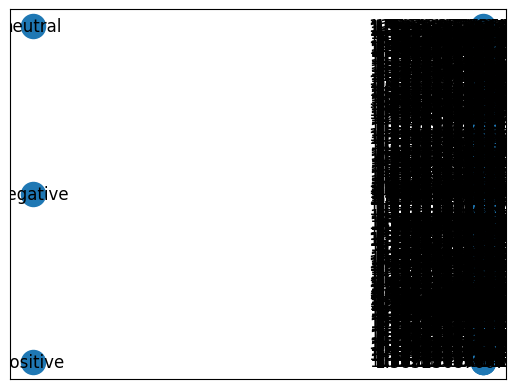

In [91]:
#TEST GRAFO BIPARTITA CON LE PRIME 1000 RIGHE DEL DATASET

dfSubset = df.head(1000)

G=nx.Graph()
G.add_nodes_from(dfSubset['Sentiment'], bipartite=0)
G.add_nodes_from(dfSubset['id'], bipartite=1, labels = None)
#G.add_edges_from([['Sentiment','id']])
nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, ['positive','neutral','negative']), width = 2)
#nx.draw(G)
plt.show()